PHYS 381: Computational Physics I

Jared Crebo 30085839

Final Take-Home Exam

Kernel: Python 3.10.11 | IDE: Visual Studio Code

2 Numerical solution of ordinary differential equations

The inductance is: 85 miliHenry (mH)

The resistance is: 5 Ohm

The capacitance is: 310 microFarad

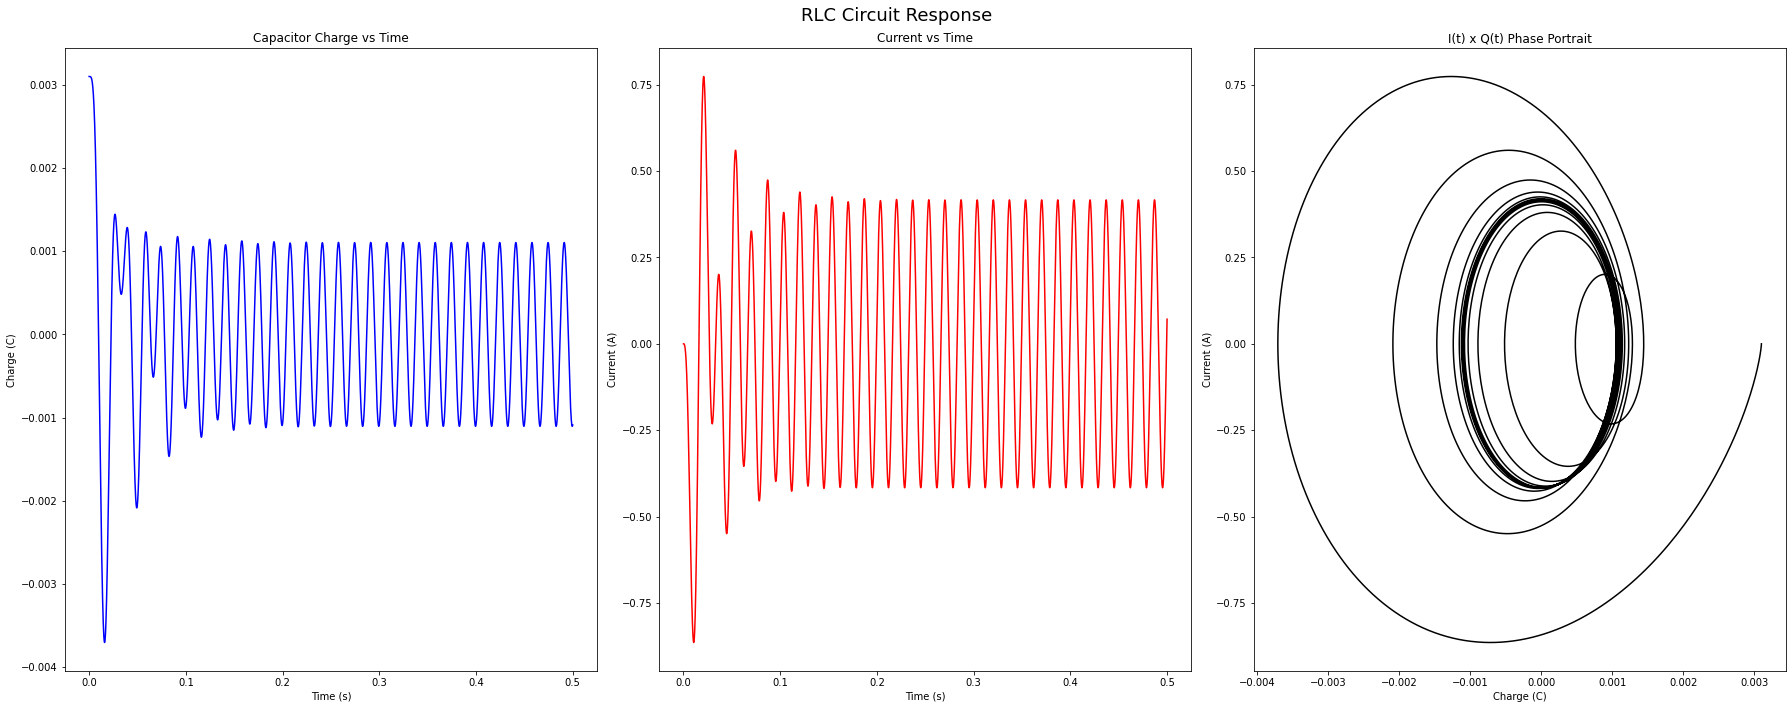

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants given by random generator
L = 85*10**-3 # H
R = 5 # Ohm
C = 310*10**-6 # F
Vo = 10 # V
freq = 60 # Hz
omega = 2 * np.pi * freq
Qo = 1 # Initial charge on capacitor
Io = 0.0 # Initial current in circuit
n = 5000 # Number of timesteps

def voltage(t):
    """Voltage function for the RLC circuit."""
    return Vo * np.cos(omega * t)

def eom(Q, I, t):
    """Equation of motion for the RLC circuit."""
    dQdt = I
    dIdt = -(R/L)*I - (1/(L*C))*Q + (1/L)*voltage(t)
    return dIdt

def solver(Qo, Io):
    '''
    Main solver function
    Qo - initial angle in rads
    Io - intial angular velocity in rads/sec
    Function takes the initial conditions and returns the capacitor charge and current at each time step.
    '''
    # Initialize arrays to store charge and current for plotting
    Q = np.zeros(n)
    I = np.zeros(n)
    t = np.zeros(n)

    # Initialize first index of array to the initial conditions
    Q[0] = Qo
    I[0] = Io
    t[0] = 0.0
    # Set the timestep value (s)
    dt = 0.0001

    for i in range(0,n-1,1):
        # For each current timestep, calculate the next charge and current based on data from the current timestep
        # Fourth Order Runge Kutta Method
        k1a = dt * I[i]
        k1b = dt * eom(Q[i], I[i], t[i])
        k2a = dt * (I[i] + k1b/2)
        k2b = dt * eom(Q[i] + k1a/2, I[i] + k1b/2, t[i] + dt/2)
        k3a = dt * (I[i] + k2b/2)
        k3b = dt * eom(Q[i] + k2a/2, I[i] + k2b/2, t[i] + dt/2)
        k4a = dt * (I[i] + k3b)
        k4b = dt * eom(Q[i] + k3a, I[i] + k3b, t[i] + dt)
        Q[i+1] = Q[i] + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
        I[i+1] = I[i] + (k1b + 2 * k2b + 2 * k3b + k4b) / 6
        t[i+1] = t[i] + dt
    # Return the charge, current, and time
    return Q, I, t

# Call the solver function for Qo = Vo * C, Io = 0
charge, current, time = solver(Vo*C, 0)

# Plot the responses with respect to time
fig, ax = plt.subplots(1,3,figsize=[25,10])
ax[0].plot(time, charge, color = 'blue', label = 'Charge')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Charge (C)')
ax[0].set_title("Capacitor Charge vs Time")
ax[1].plot(time, current, color = 'red', label = 'Current')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Current (A)')
ax[1].set_title("Current vs Time")
ax[2].plot(charge, current, color = 'black', label = 'Phase Portrait')
ax[2].set_xlabel('Charge (C)')
ax[2].set_ylabel('Current (A)')
ax[2].set_title("I(t) x Q(t) Phase Portrait")
fig.suptitle("RLC Circuit Response", fontsize = 18)
fig.tight_layout()

The RLC circuit is a driven electrical circuit consisting of a resistor, an inductor, and a capacitor. It's equation of motion is described as $L\frac{d^{2}Q}{dt^{2}}+R\frac{dQ}{dt}+Q/C=V(t)$. The fourth-order Runge-Kutta method is employed to solve for $\frac{d^{2}Q}{dt^{2}}$ given the initial conditions $Q_{o}/C = 10V$ and $I_{o} = 0A$. This is used to solve for Q(t) and I(t) at each timestep to be able to visualize its response. The fourth-order Runge-Kutta method takes a weighted-average of the slope at 4 points between the $t, t + dt$, providing a more accurate calculation of the function at the next timestep than lower-order methods. 

The figure above shows the capacitor charge and current responses plotted against time on the left and middle plots, respectively. The right plot shows the I(t) x Q(t) phase portrait as it evolves over time from its initial conditions to a steady state response. A small timestep, $\Delta t = 0.0001s$, was chosen to ensure the entire response was captured in detail since the oscillations occur at a very rapid pace (60 Hz). 

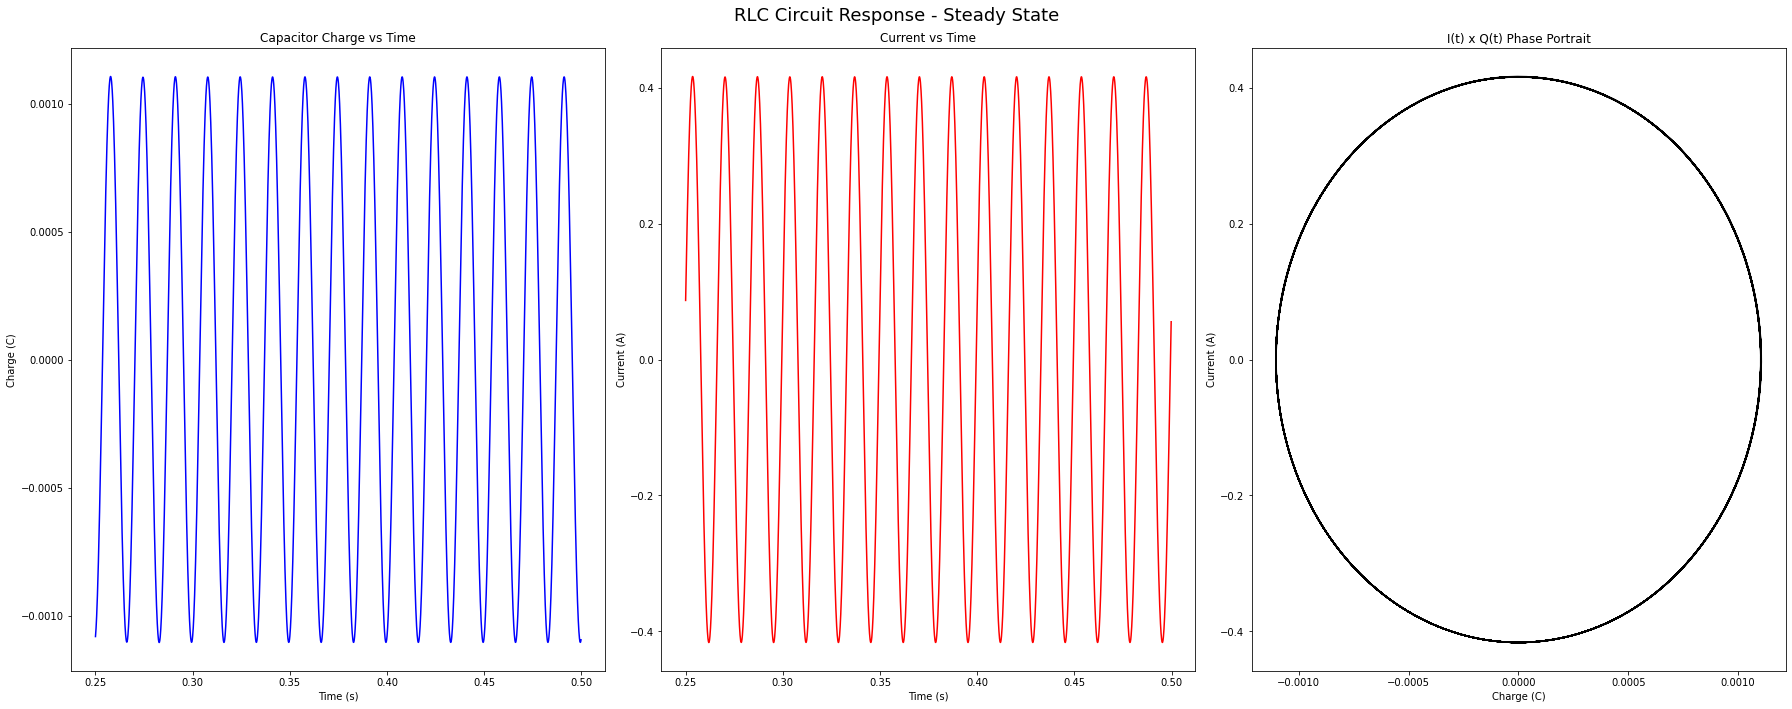

In [ ]:
# Plot the steady state reponses
fig, ax = plt.subplots(1,3,figsize=[25,10])
ax[0].plot(time[int(n/2):-1], charge[int(n/2):-1], color = 'blue', label = 'Charge')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Charge (C)')
ax[0].set_title("Capacitor Charge vs Time")
ax[1].plot(time[int(n/2):-1], current[int(n/2):-1], color = 'red', label = 'Current')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Current (A)')
ax[1].set_title("Current vs Time")
ax[2].plot(charge[int(n/2):-1], current[int(n/2):-1], color = 'black', label = 'Phase Portrait')
ax[2].set_xlabel('Charge (C)')
ax[2].set_ylabel('Current (A)')
ax[2].set_title("I(t) x Q(t) Phase Portrait")
fig.suptitle("RLC Circuit Response - Steady State", fontsize = 18)
fig.tight_layout()

This figure shows the same data as before but only the steady state response starting at $t = 0.25s$. This is no longer changing its current behaviour with time and shows how the system will continue to respond as it tends towards infinity. 